<a href="https://colab.research.google.com/github/DNKS0496/Data-Science-Projects/blob/master/MAJIC_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

In [2]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
# converting class to 0 and 1
df['class'] = (df['class']=='g').astype(int)

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

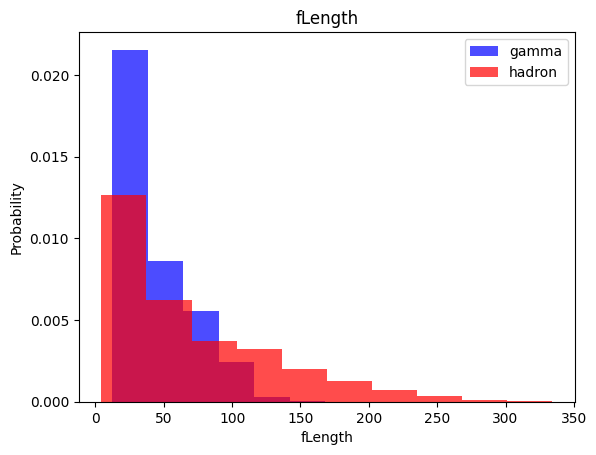

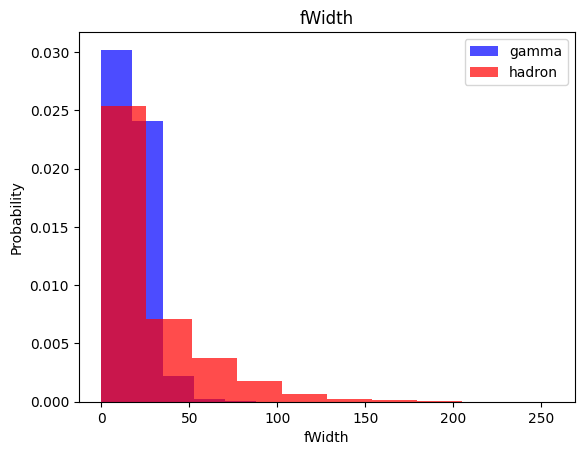

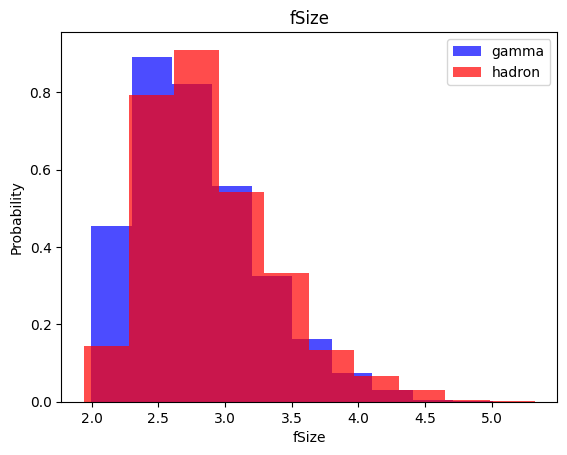

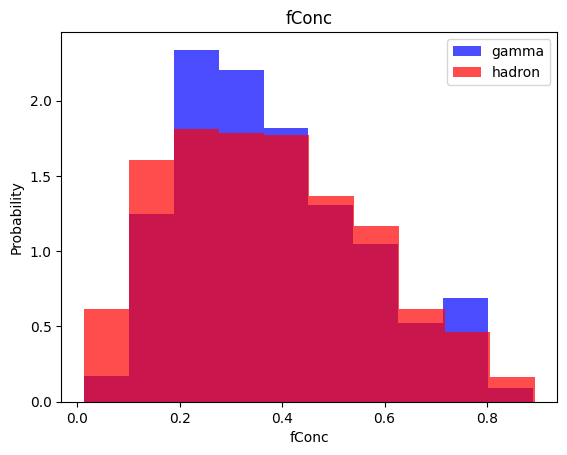

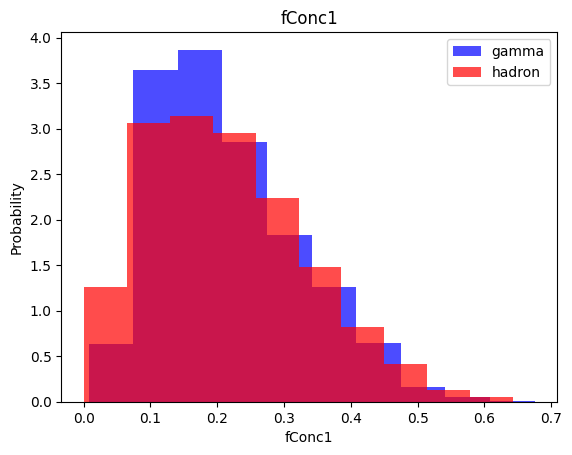

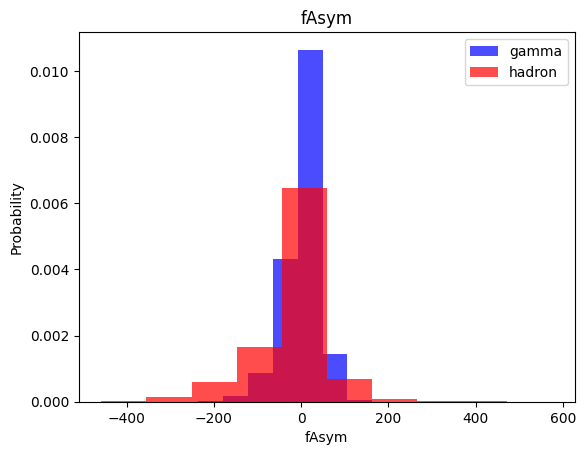

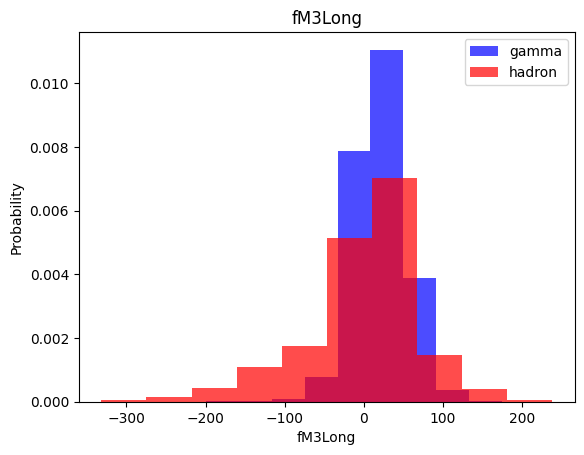

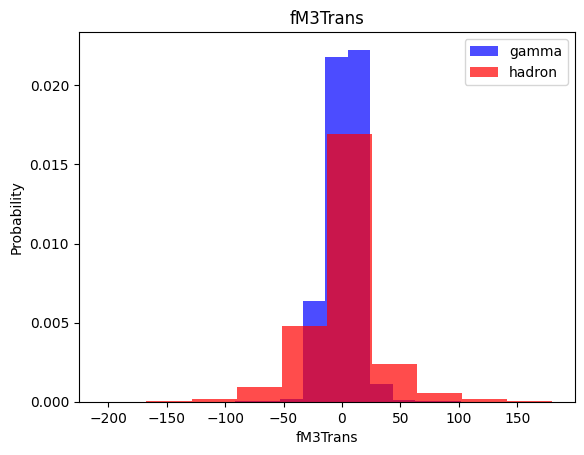

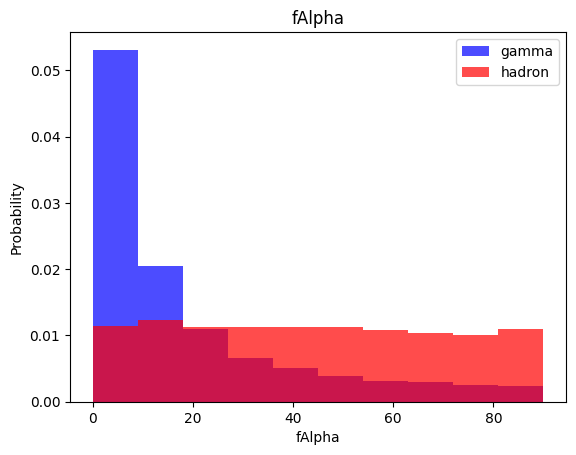

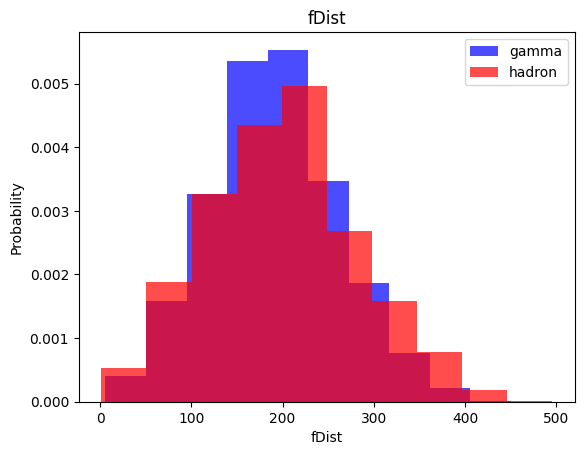

In [5]:
# can also use df.columns if cols was not available for getting column labels
# plot histogram for each column label where class is 1
# alpha is the transparency
# density normalizes the data
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability') # since we are using density
  plt.xlabel(label)
  plt.legend()
  plt.show()


# Train, validation and test datasets

In [6]:
# df.sample shuffles the data
# to split data we are passing the end index of df in list 0.6 passes 60% next 0.8 passes between 60 to 80% and remaining into test
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [7]:
# scaling the data to bring them to 0 mean and 1 variance
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  # fit resample takes more samples of less class so it matches with big class
  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  # converting whole data into a 2d numpy array
  # x is 2d object but y is 1d, hence reshape y
  # -1 is same as len(y) it means infer the dimension of y
  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data,x,y

In [8]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7366
4046


In [9]:
# since number of gamma and hardons are not similar it would become an issue
# Hence we oversample hadrom to match gamma
# add the ovesrsample to the scale_dataset function
# oversample is set false for validation and test dataset as we want to check how the model performs for unseen data
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [10]:
# data is now evenly rebalanced
len(y_train), sum(y_train==1), sum(y_train==0)

(14732, 7366, 7366)

# KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
# tried for n_neighbors = 1 and 3
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn_model.predict(x_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1317
           1       0.86      0.85      0.86      2487

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.81      0.81      3804



# Naive-Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [17]:
# Overall accuracy is similar but results are poor compared to previous model
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1317
           1       0.74      0.90      0.81      2487

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [20]:
# performs better than naive-bayes but not as good as knn
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1317
           1       0.85      0.82      0.83      2487

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machines

In [21]:
from sklearn.svm import SVC

In [22]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [23]:
# gives best accuracy for this dataset
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1317
           1       0.90      0.89      0.89      2487

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [24]:
import tensorflow as tf

In [25]:
def plot_history(history):
  # require 1 row and 2 columns for that row
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  
  plt.show()

In [26]:
# writing a function so we can change various parameters and improve the model
# we can send valid_data by replacing validation_split with validation_data=valid
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )
  return nn_model,history

16 nodes, dropout 0, lr 0.01, batch_size 32


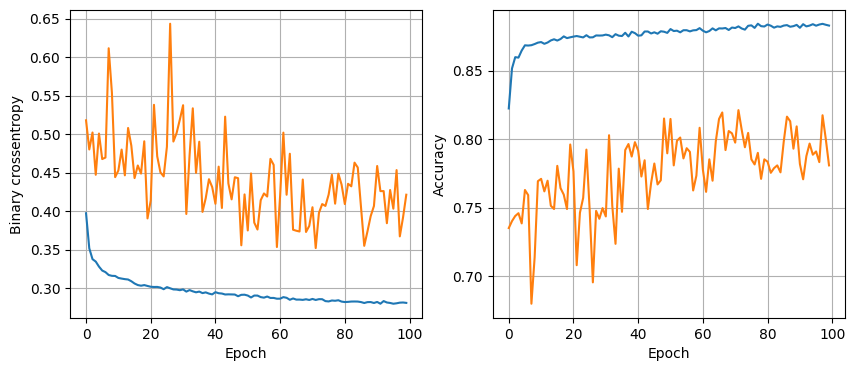

119/119 [==============================] - 0s 3ms/step - loss: 0.3312 - accuracy: 0.8615
16 nodes, dropout 0, lr 0.01, batch_size 64


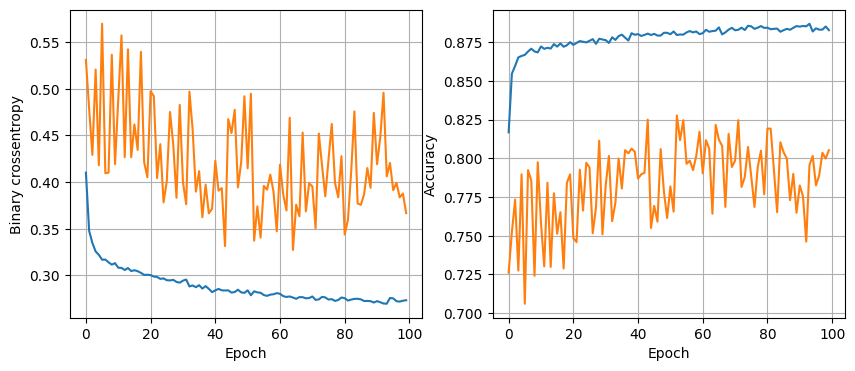

119/119 [==============================] - 0s 3ms/step - loss: 0.3356 - accuracy: 0.8662
16 nodes, dropout 0, lr 0.01, batch_size 128


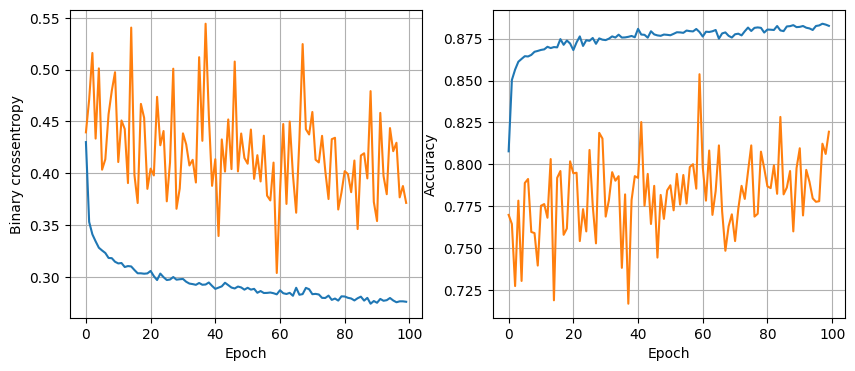

119/119 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8693
16 nodes, dropout 0, lr 0.005, batch_size 32


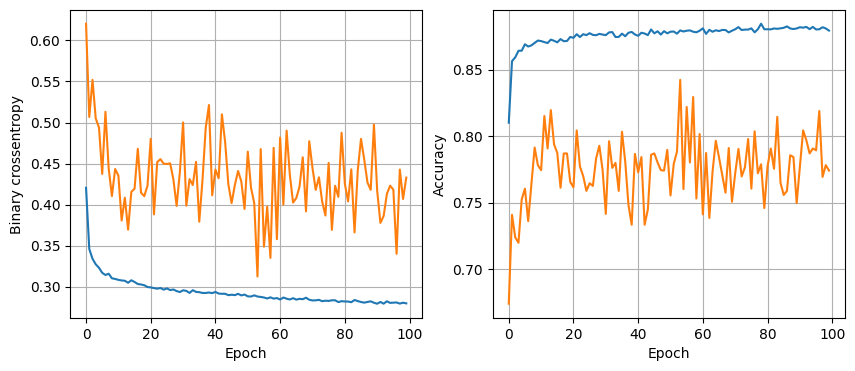

119/119 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8709
16 nodes, dropout 0, lr 0.005, batch_size 64


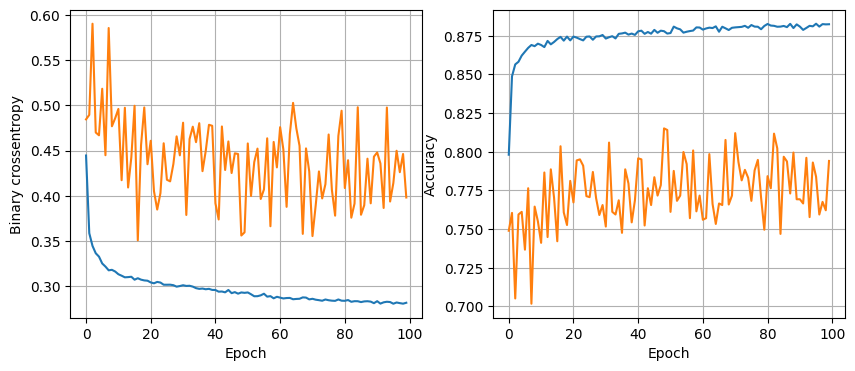

119/119 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8743
16 nodes, dropout 0, lr 0.005, batch_size 128


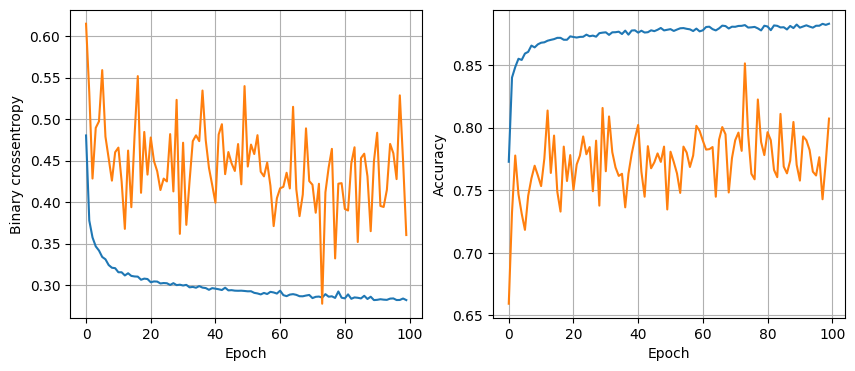

119/119 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8715
16 nodes, dropout 0, lr 0.001, batch_size 32


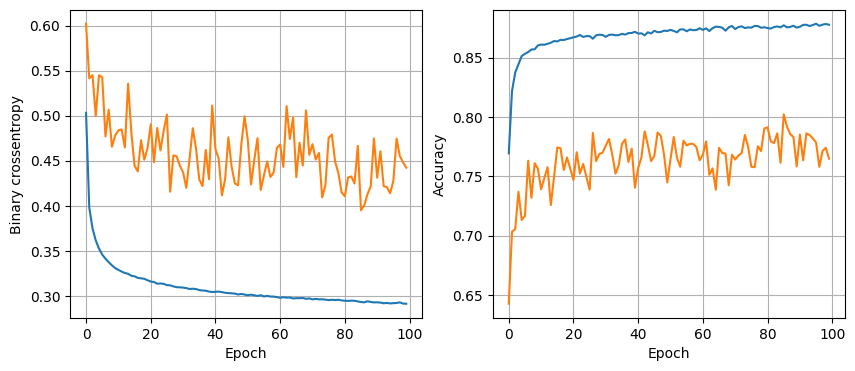

119/119 [==============================] - 0s 3ms/step - loss: 0.3185 - accuracy: 0.8707
16 nodes, dropout 0, lr 0.001, batch_size 64


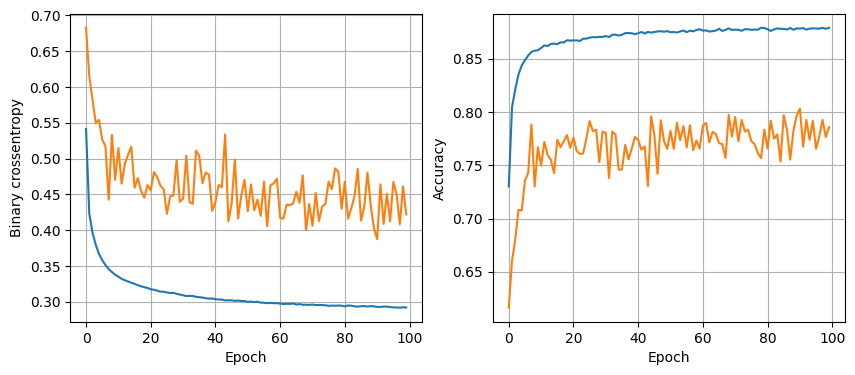

119/119 [==============================] - 0s 3ms/step - loss: 0.3089 - accuracy: 0.8730
16 nodes, dropout 0, lr 0.001, batch_size 128


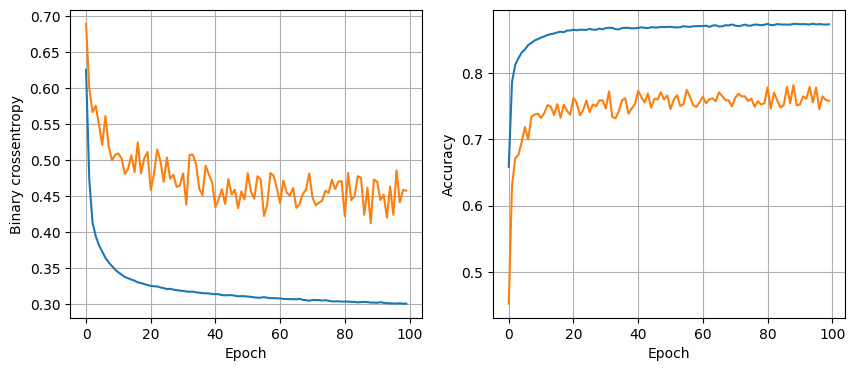

119/119 [==============================] - 0s 4ms/step - loss: 0.3173 - accuracy: 0.8707
16 nodes, dropout 0.2, lr 0.01, batch_size 32


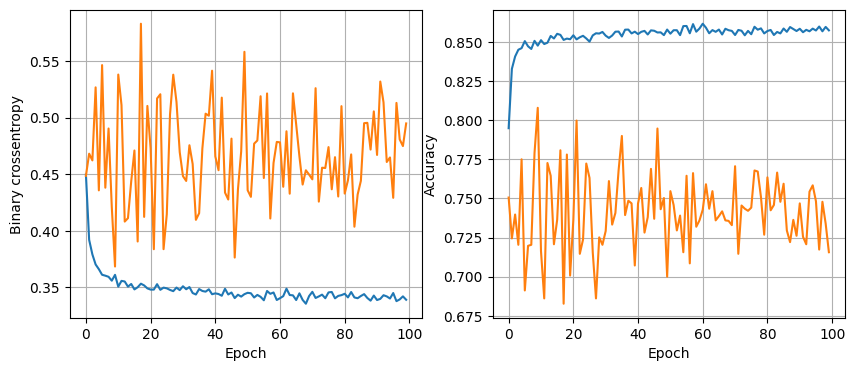

119/119 [==============================] - 0s 3ms/step - loss: 0.3215 - accuracy: 0.8691
16 nodes, dropout 0.2, lr 0.01, batch_size 64


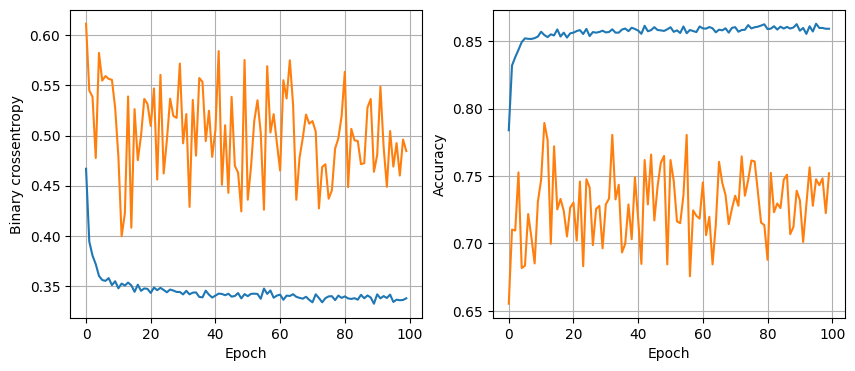

119/119 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8680
16 nodes, dropout 0.2, lr 0.01, batch_size 128


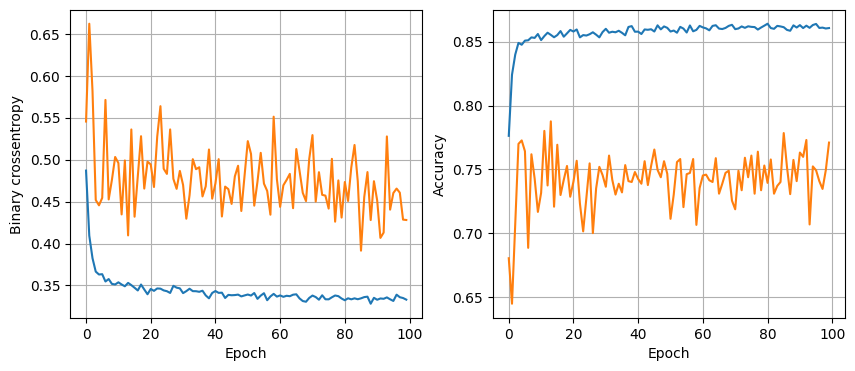

119/119 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8730
16 nodes, dropout 0.2, lr 0.005, batch_size 32


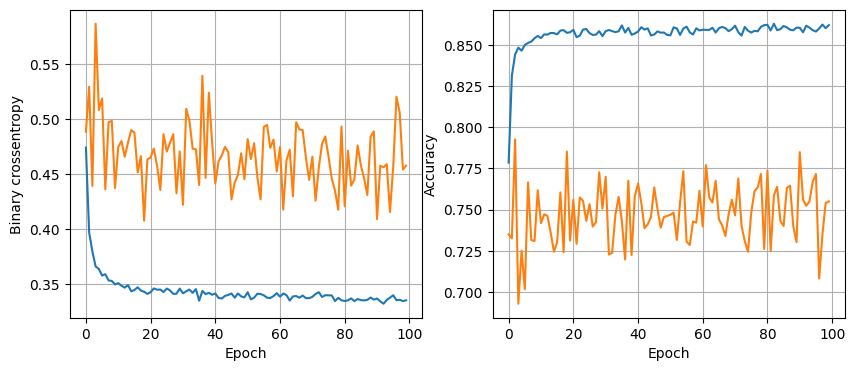

119/119 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.8751
16 nodes, dropout 0.2, lr 0.005, batch_size 64


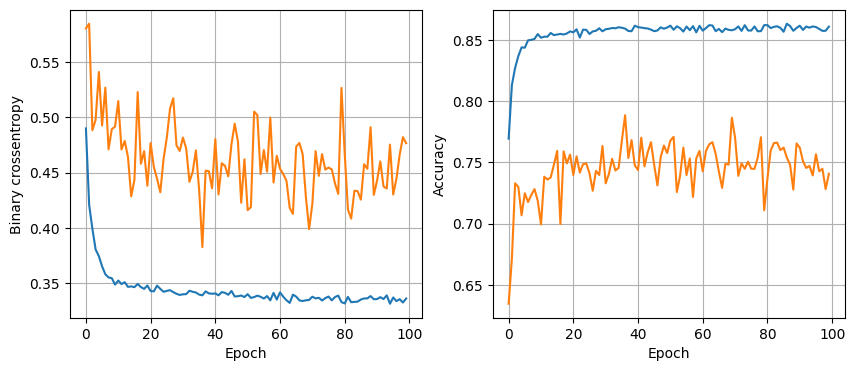

119/119 [==============================] - 0s 3ms/step - loss: 0.3106 - accuracy: 0.8736
16 nodes, dropout 0.2, lr 0.005, batch_size 128


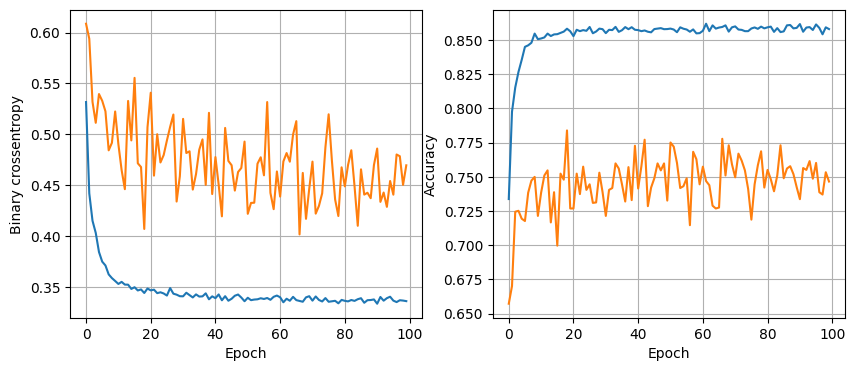

119/119 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.8743
16 nodes, dropout 0.2, lr 0.001, batch_size 32


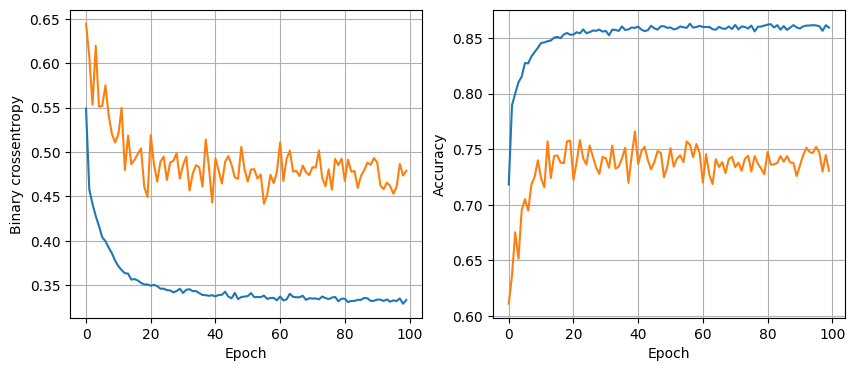

119/119 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.8707
16 nodes, dropout 0.2, lr 0.001, batch_size 64


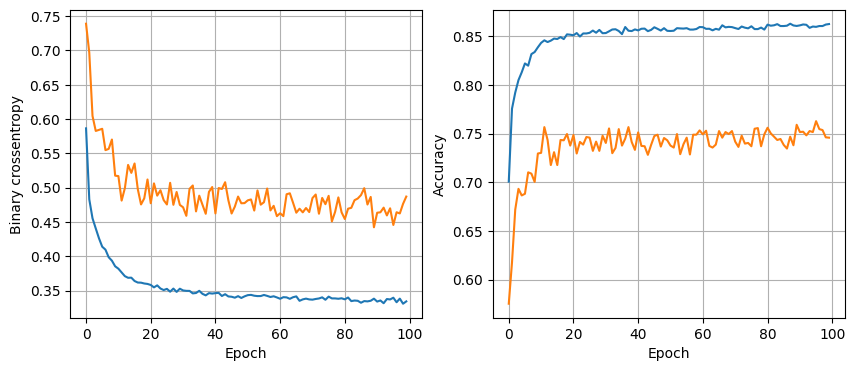

119/119 [==============================] - 0s 3ms/step - loss: 0.3122 - accuracy: 0.8730
16 nodes, dropout 0.2, lr 0.001, batch_size 128


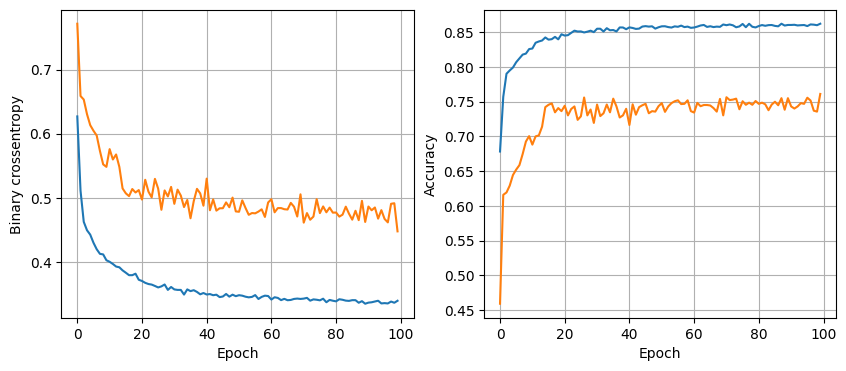

119/119 [==============================] - 0s 3ms/step - loss: 0.3160 - accuracy: 0.8720
32 nodes, dropout 0, lr 0.01, batch_size 32


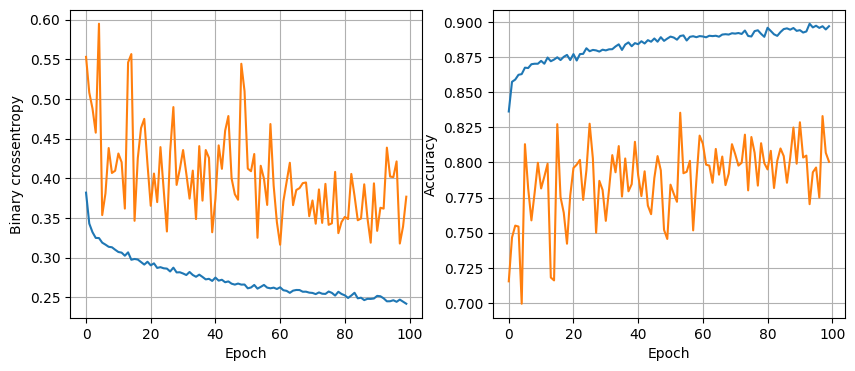

119/119 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8667
32 nodes, dropout 0, lr 0.01, batch_size 64


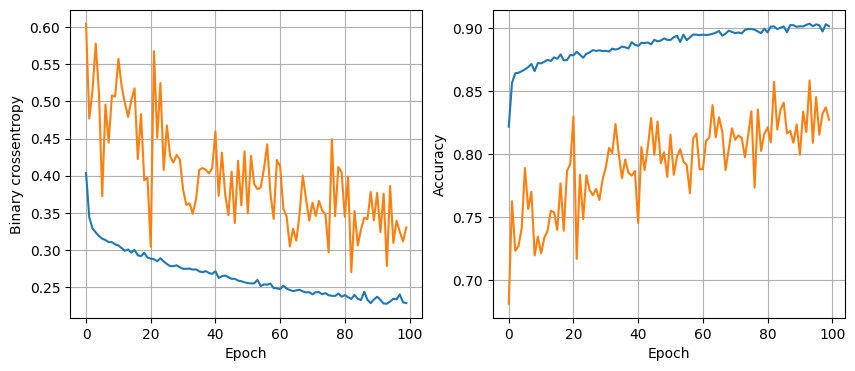

119/119 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8633
32 nodes, dropout 0, lr 0.01, batch_size 128


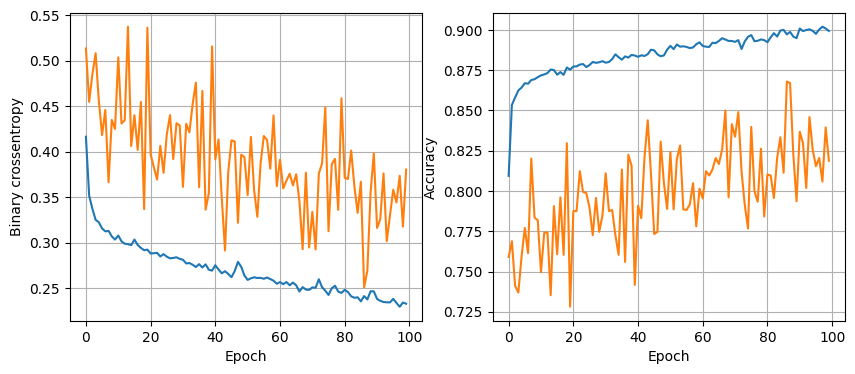

119/119 [==============================] - 0s 3ms/step - loss: 0.3588 - accuracy: 0.8644
32 nodes, dropout 0, lr 0.005, batch_size 32


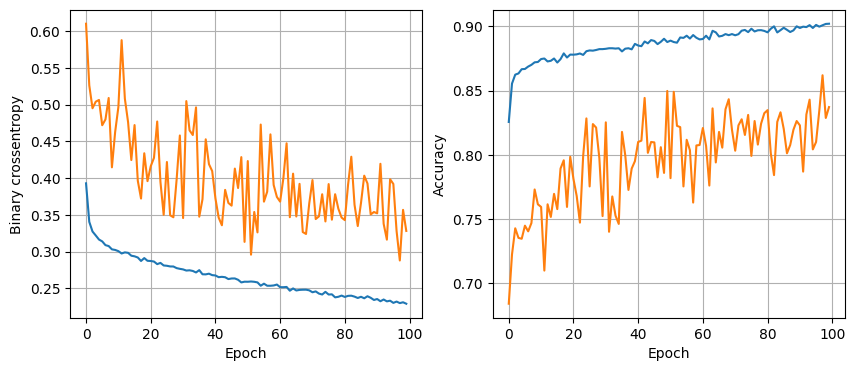

119/119 [==============================] - 0s 3ms/step - loss: 0.3781 - accuracy: 0.8609
32 nodes, dropout 0, lr 0.005, batch_size 64


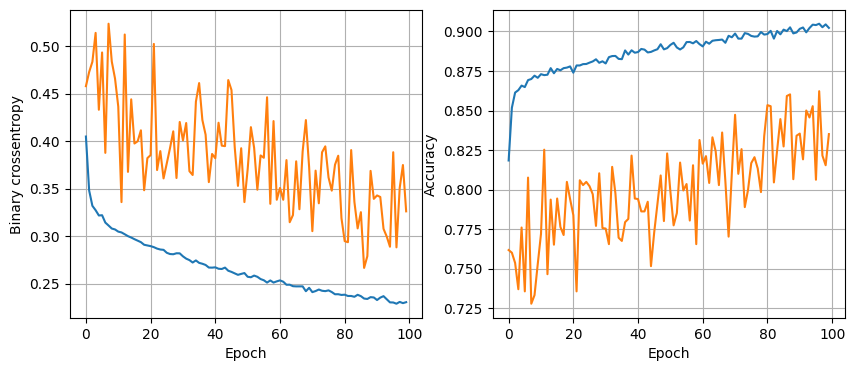

119/119 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.8680
32 nodes, dropout 0, lr 0.005, batch_size 128


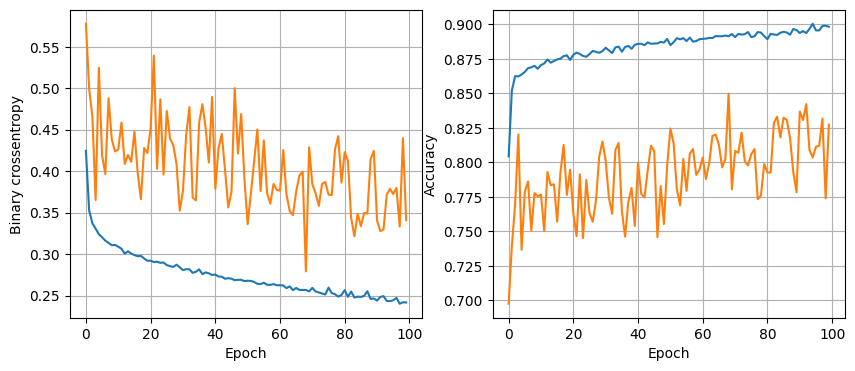

119/119 [==============================] - 0s 3ms/step - loss: 0.3325 - accuracy: 0.8678
32 nodes, dropout 0, lr 0.001, batch_size 32


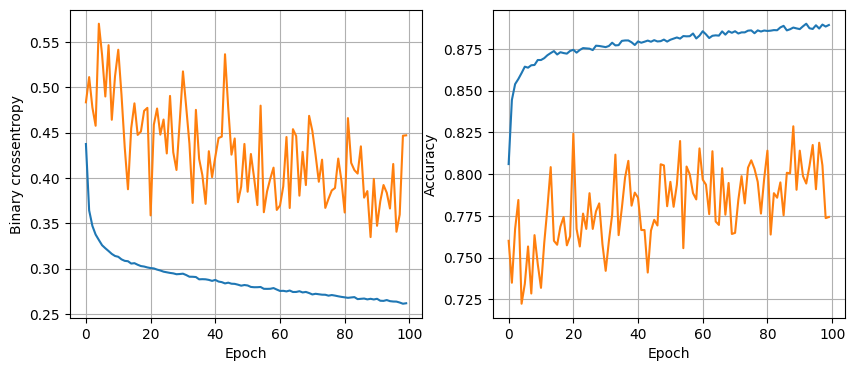

119/119 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.8696
32 nodes, dropout 0, lr 0.001, batch_size 64


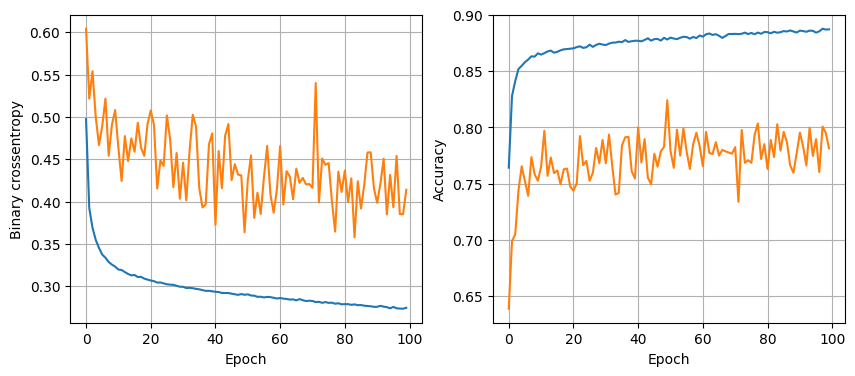

119/119 [==============================] - 0s 3ms/step - loss: 0.3164 - accuracy: 0.8772
32 nodes, dropout 0, lr 0.001, batch_size 128


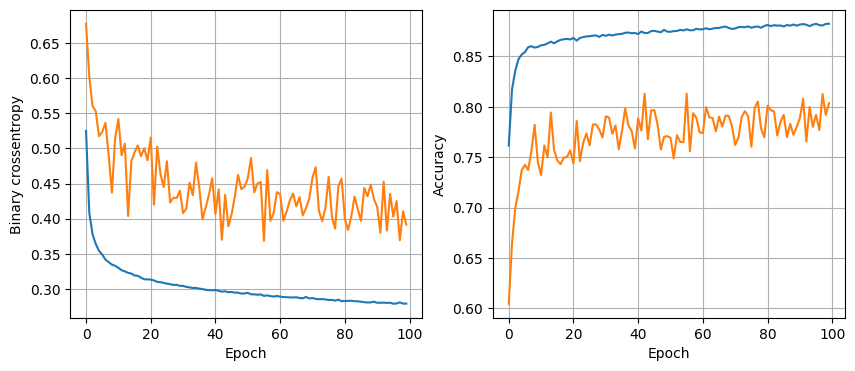

119/119 [==============================] - 0s 3ms/step - loss: 0.3115 - accuracy: 0.8720
32 nodes, dropout 0.2, lr 0.01, batch_size 32


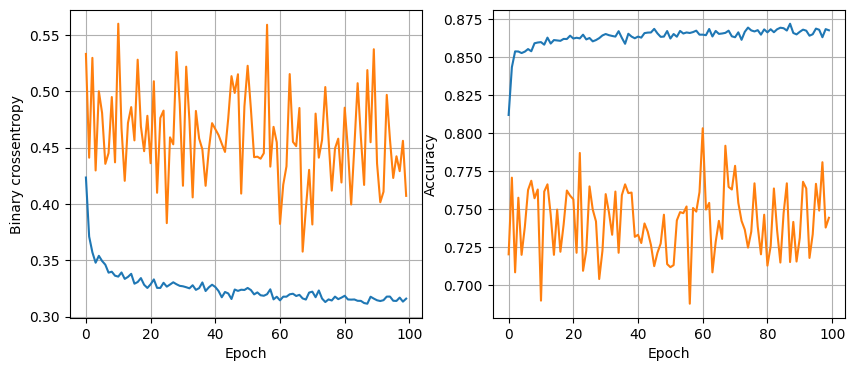

119/119 [==============================] - 0s 3ms/step - loss: 0.3237 - accuracy: 0.8738
32 nodes, dropout 0.2, lr 0.01, batch_size 64


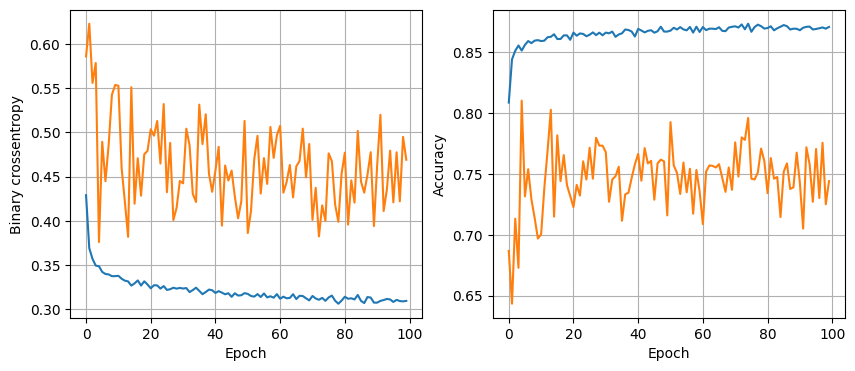

119/119 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8709
32 nodes, dropout 0.2, lr 0.01, batch_size 128


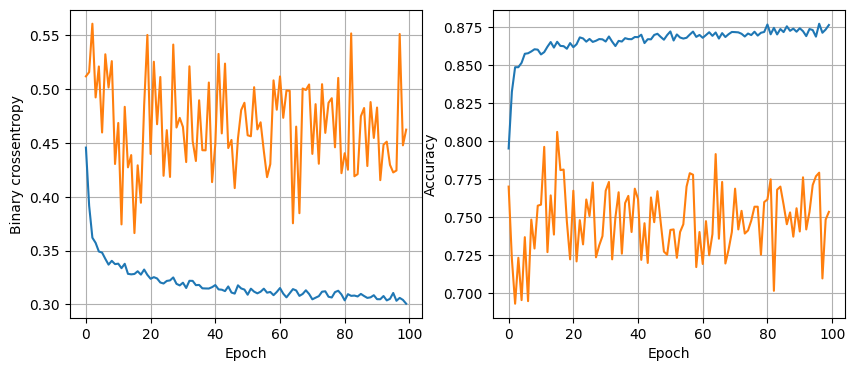

119/119 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.005, batch_size 32


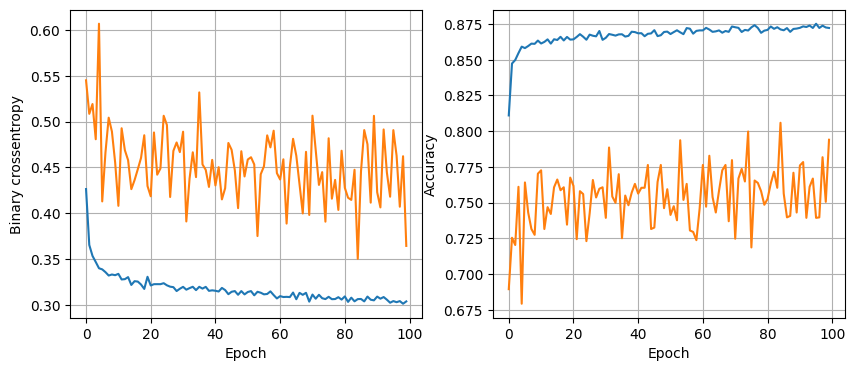

119/119 [==============================] - 0s 3ms/step - loss: 0.3121 - accuracy: 0.8730
32 nodes, dropout 0.2, lr 0.005, batch_size 64


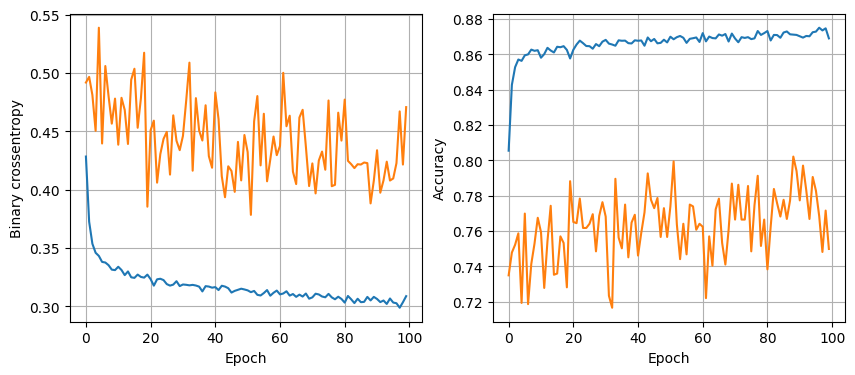

119/119 [==============================] - 0s 4ms/step - loss: 0.3042 - accuracy: 0.8728
32 nodes, dropout 0.2, lr 0.005, batch_size 128


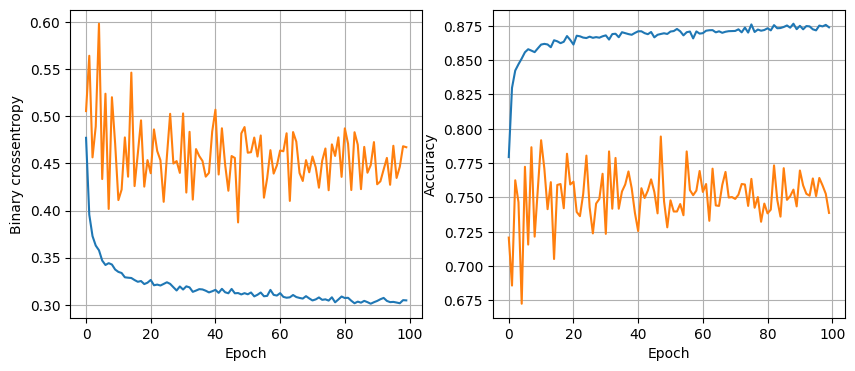

119/119 [==============================] - 0s 3ms/step - loss: 0.3026 - accuracy: 0.8770
32 nodes, dropout 0.2, lr 0.001, batch_size 32


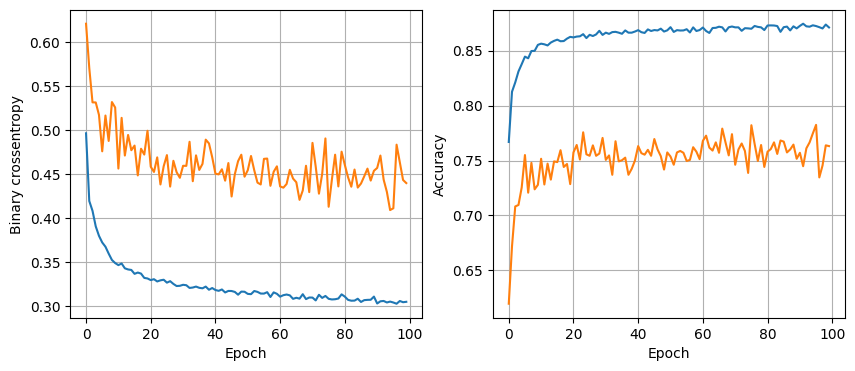

119/119 [==============================] - 0s 3ms/step - loss: 0.3036 - accuracy: 0.8743
32 nodes, dropout 0.2, lr 0.001, batch_size 64


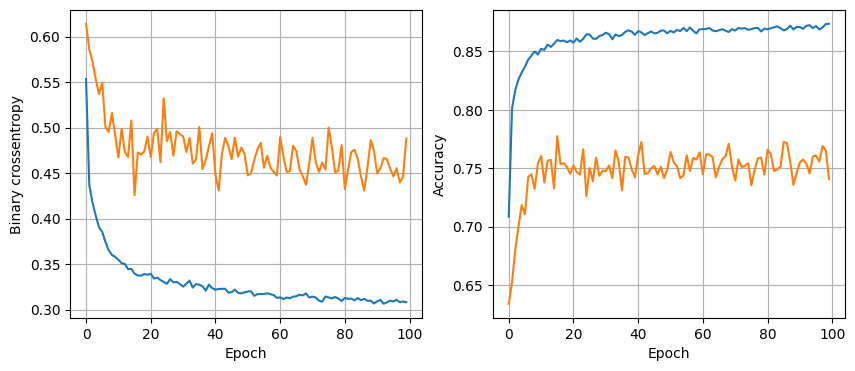

119/119 [==============================] - 0s 3ms/step - loss: 0.3040 - accuracy: 0.8743
32 nodes, dropout 0.2, lr 0.001, batch_size 128


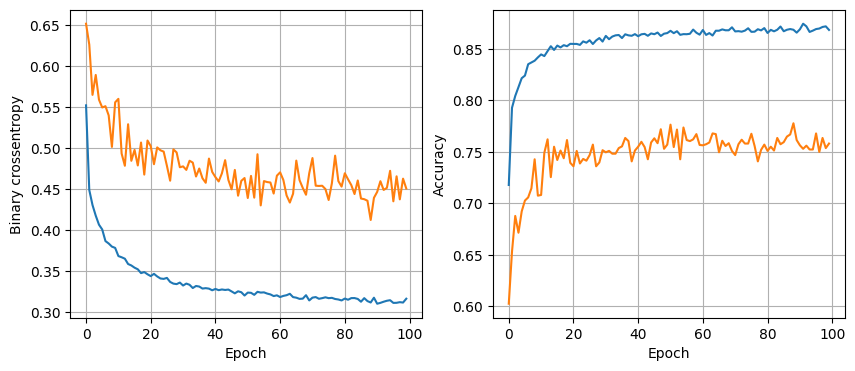

119/119 [==============================] - 0s 3ms/step - loss: 0.3028 - accuracy: 0.8754
64 nodes, dropout 0, lr 0.01, batch_size 32


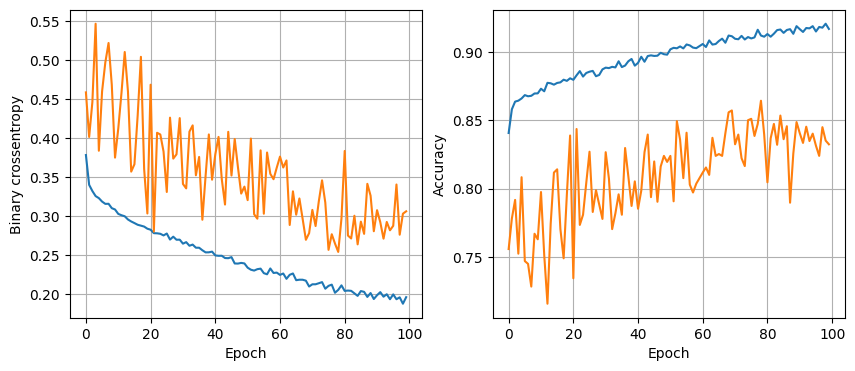

119/119 [==============================] - 0s 3ms/step - loss: 0.5314 - accuracy: 0.8651
64 nodes, dropout 0, lr 0.01, batch_size 64


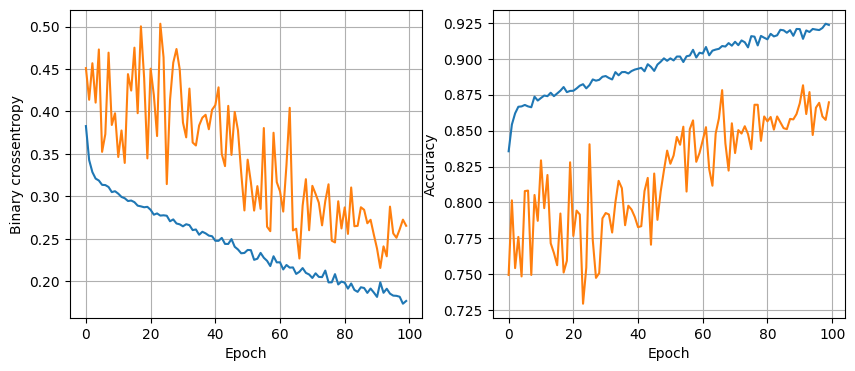

119/119 [==============================] - 0s 3ms/step - loss: 0.5489 - accuracy: 0.8559
64 nodes, dropout 0, lr 0.01, batch_size 128


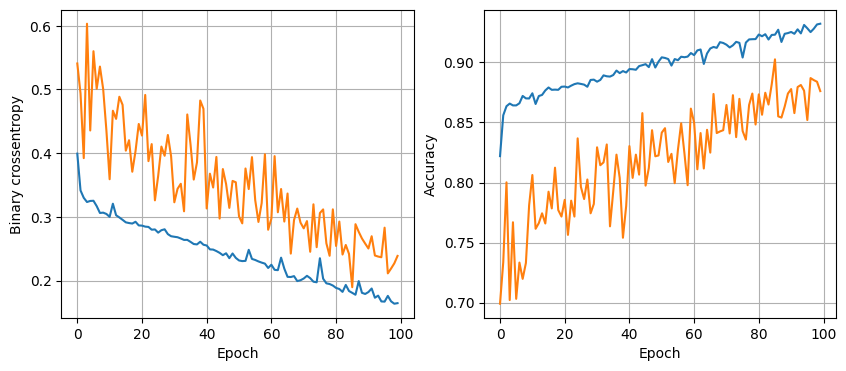

119/119 [==============================] - 0s 3ms/step - loss: 0.5538 - accuracy: 0.8588
64 nodes, dropout 0, lr 0.005, batch_size 32


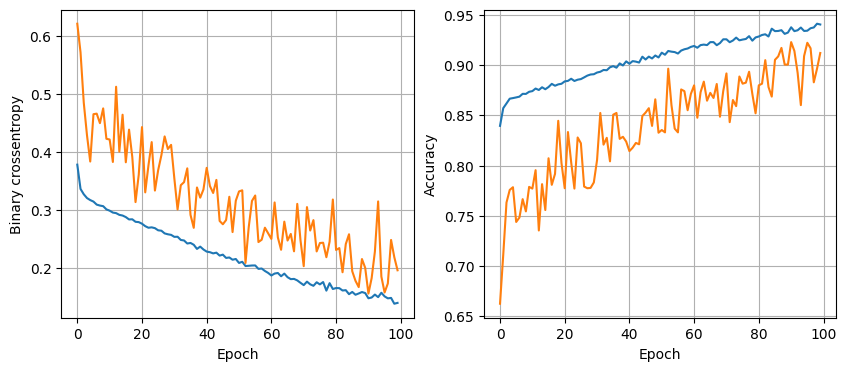

119/119 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.8546
64 nodes, dropout 0, lr 0.005, batch_size 64


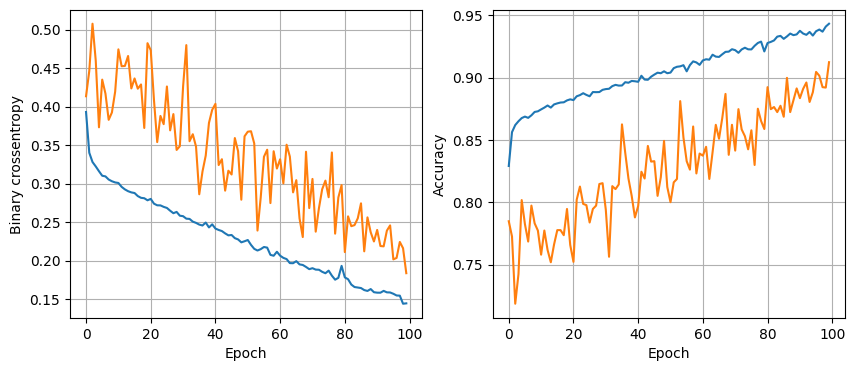

119/119 [==============================] - 0s 3ms/step - loss: 0.5632 - accuracy: 0.8586
64 nodes, dropout 0, lr 0.005, batch_size 128


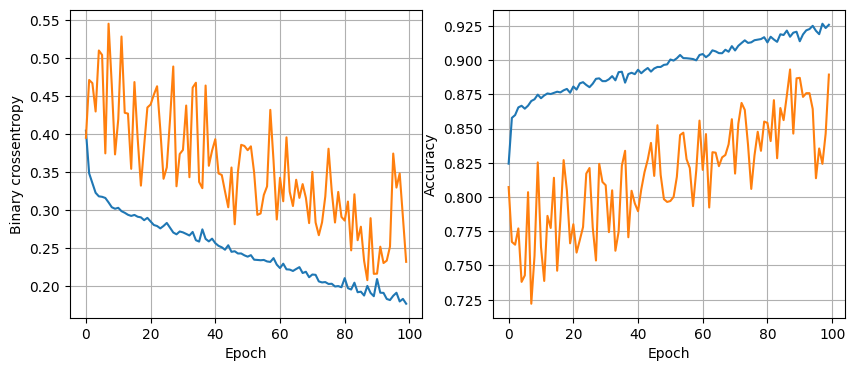

119/119 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.8504
64 nodes, dropout 0, lr 0.001, batch_size 32


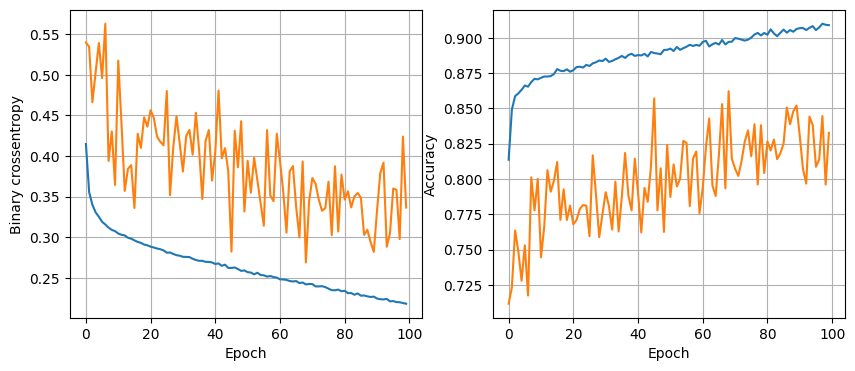

119/119 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.8659
64 nodes, dropout 0, lr 0.001, batch_size 64


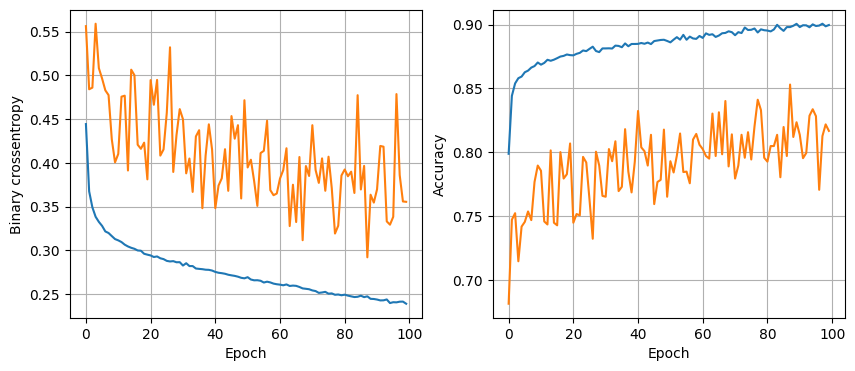

119/119 [==============================] - 0s 3ms/step - loss: 0.3275 - accuracy: 0.8680
64 nodes, dropout 0, lr 0.001, batch_size 128


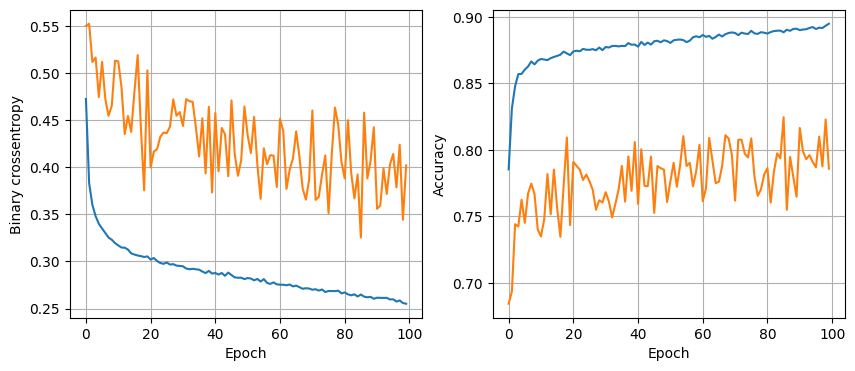

119/119 [==============================] - 0s 3ms/step - loss: 0.3123 - accuracy: 0.8778
64 nodes, dropout 0.2, lr 0.01, batch_size 32


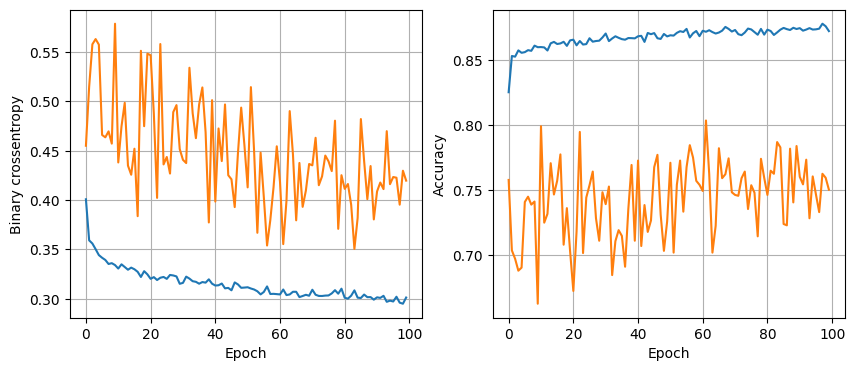

119/119 [==============================] - 0s 3ms/step - loss: 0.3156 - accuracy: 0.8730
64 nodes, dropout 0.2, lr 0.01, batch_size 64


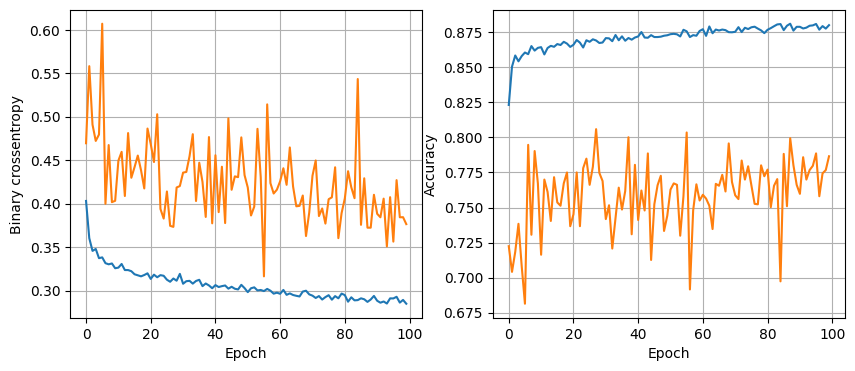

119/119 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8767
64 nodes, dropout 0.2, lr 0.01, batch_size 128


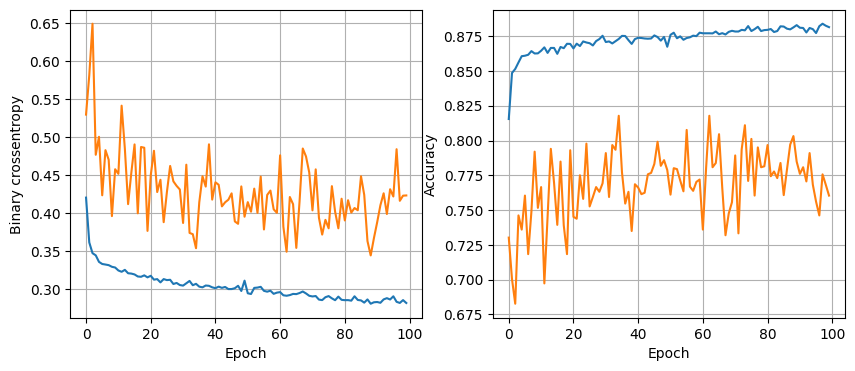

119/119 [==============================] - 0s 3ms/step - loss: 0.3051 - accuracy: 0.8772
64 nodes, dropout 0.2, lr 0.005, batch_size 32


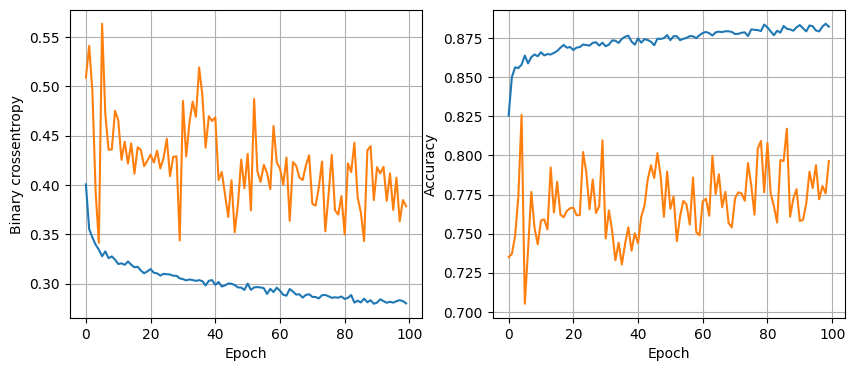

119/119 [==============================] - 0s 3ms/step - loss: 0.3055 - accuracy: 0.8793
64 nodes, dropout 0.2, lr 0.005, batch_size 64


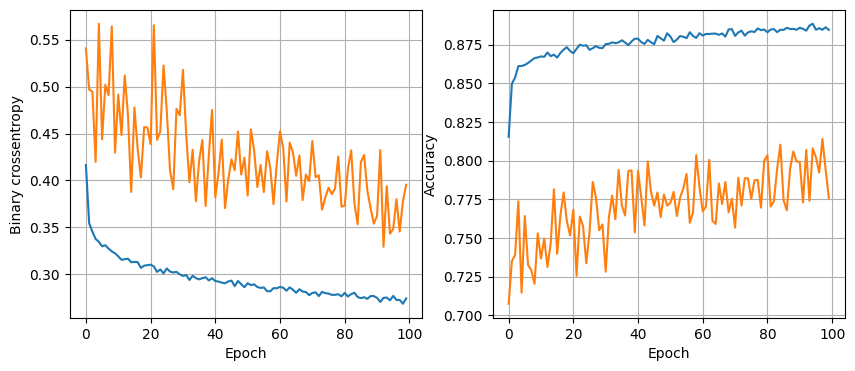

119/119 [==============================] - 0s 3ms/step - loss: 0.3045 - accuracy: 0.8785
64 nodes, dropout 0.2, lr 0.005, batch_size 128


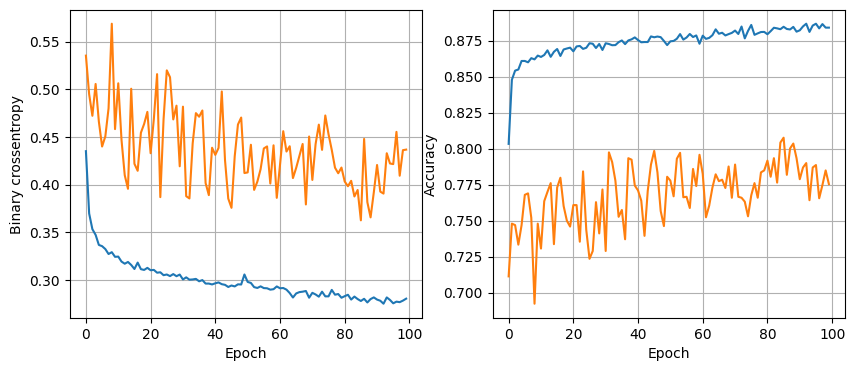

119/119 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8746
64 nodes, dropout 0.2, lr 0.001, batch_size 32


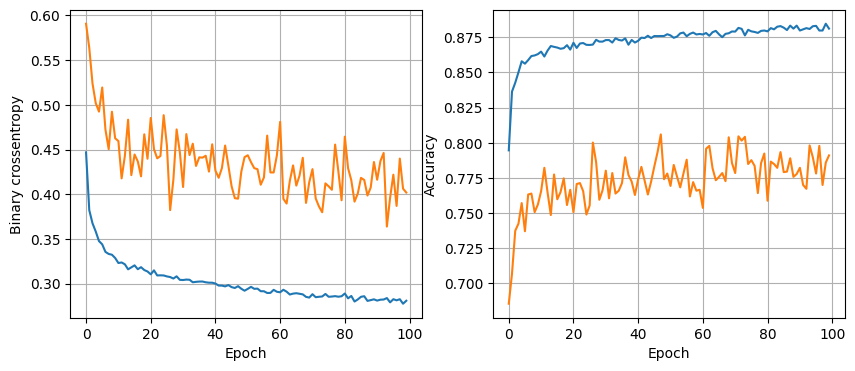

119/119 [==============================] - 0s 3ms/step - loss: 0.3014 - accuracy: 0.8796
64 nodes, dropout 0.2, lr 0.001, batch_size 64


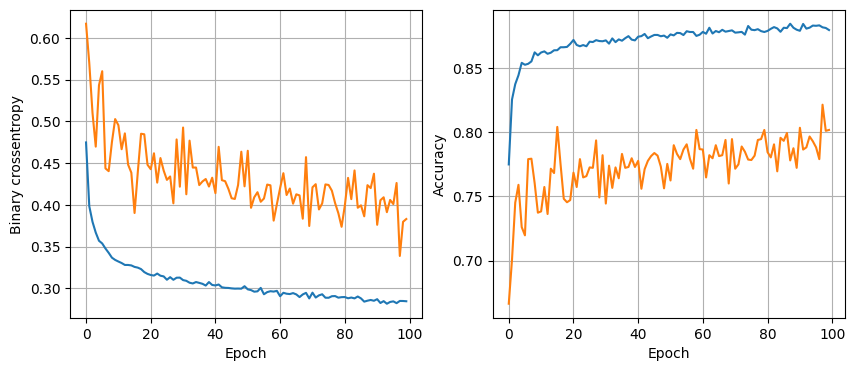

119/119 [==============================] - 0s 3ms/step - loss: 0.2965 - accuracy: 0.8804
64 nodes, dropout 0.2, lr 0.001, batch_size 128


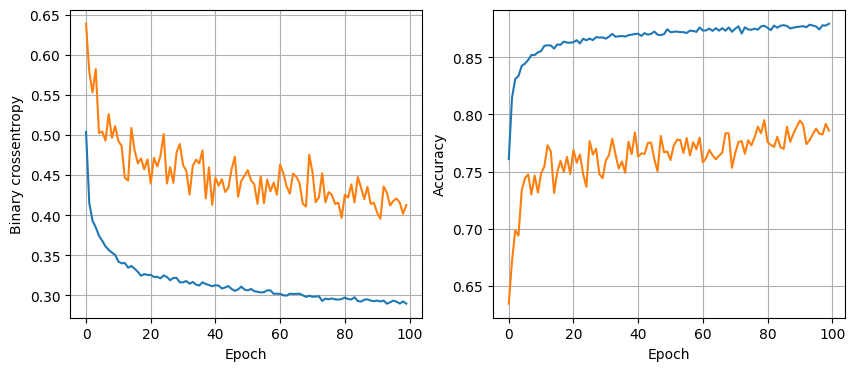

119/119 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8770


In [27]:
# validation_set informs how much % of the data in the training set should be left out for validation
# verbose set to 0 will not print anything about the updates of each epoch
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [28]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1317
           1       0.89      0.93      0.91      2487

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

